<a href="https://colab.research.google.com/github/EON-LEE/Course-DeepLearning/blob/main/Week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 14주차 강의

## 환경설정

In [ ]:
import tensorflow as tf
import subprocess
import sys

# 현재 텐서플로우 버전 확인
current_version = tf.__version__
desired_version = "2.18.0"  # 원하는 버전 지정

print(f"현재 TensorFlow 버전: {current_version}")
print(f"원하는 TensorFlow 버전: {desired_version}")

# 버전 비교 및 설치
if current_version != desired_version:
    print(f"TensorFlow {desired_version}으로 설치를 시작합니다...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", f"tensorflow=={desired_version}"])
    print(f"TensorFlow {desired_version} 설치 완료. 코드를 다시 실행하세요.")
else:
    print("이미 원하는 버전이 설치되어 있습니다.")

# 순환 신경망으로 IMDB 리뷰 분류하기

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## IMDB 리뷰 데이터셋

## Data Load

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print('훈련용 리뷰 개수 : {}'.format(len(train_input)))
print('테스트용 리뷰 개수 : {}'.format(len(test_input)))
num_classes = len(set(train_target))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print('첫번째 훈련용 리뷰 :',train_input[0])
print('첫번째 훈련용 리뷰의 레이블 :',train_target[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


In [5]:
print(len(train_input[0]))

218


In [6]:
print(len(train_input[1]))

189


In [7]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [8]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [9]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [10]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

리뷰의 최대 길이 : 1854
리뷰의 평균 길이 : 239.00925


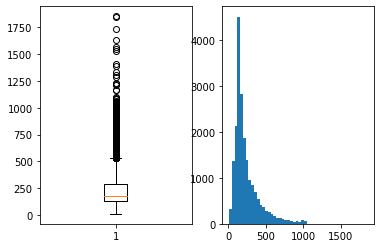

In [11]:
import matplotlib.pyplot as plt
import numpy as np

reviews_length = [len(review) for review in train_input]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(lengths, bins=50)
plt.show()

## Preprocessing

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
train_input.shape

(20000,)

In [14]:
print(train_seq.shape)

(20000, 100)


In [15]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [16]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [17]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [18]:
val_seq = pad_sequences(val_input, maxlen=100)

## Build RNN Model

In [19]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


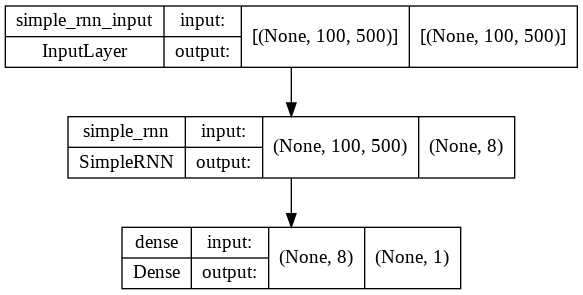

In [21]:
tf.keras.utils.plot_model(model,  show_shapes=True)

In [ ]:
# 2025/05/05 - 메모리 이슈로 수정

# train_oh = keras.utils.to_categorical(train_seq)
train_oh = tf.one_hot(train_seq, depth=500)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
# 2025/05/05 - 메모리 이슈로 수정

# val_oh = keras.utils.to_categorical(val_seq)
val_oh = tf.one_hot(val_seq, depth=500)

## Training

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

2022-05-19 01:29:41.697697: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4000000000 exceeds 10% of free system memory.
2022-05-19 01:29:45.305189: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4000000000 exceeds 10% of free system memory.


Epoch 1/100
313/313 [==============================] - 16s 49ms/step - loss: 0.6989 - accuracy: 0.5041 - val_loss: 0.6978 - val_accuracy: 0.5038
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6946 - accuracy: 0.5102 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6916 - val_accuracy: 0.5230
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6883 - accuracy: 0.5408 - val_loss: 0.6905 - val_accuracy: 0.5270
Epoch 6/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6866 - accuracy: 0.5472 - val_loss: 0.6894 - val_accuracy: 0.5356
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6845 - accuracy: 0.5563 - val_loss: 0.6880 - val_ac

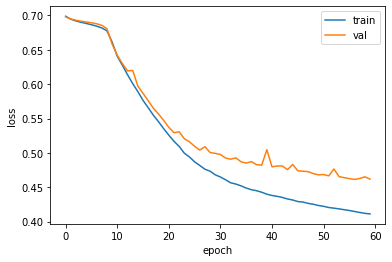

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()